# Analyse reindexation from ABES - April 2023

# Set project

### Packages

In [1]:
# Import librairies
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings



from utils_metrics import *
from utils_visualization import *

2023-05-12 08:46:32.802403: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 08:46:33.230282: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-12 08:46:33.667117: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-12 08:46:33.667403: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [2]:
# Suppression des FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### Graphical parameters

In [3]:
# Parametres graphiques
%matplotlib inline
rcParams = {
    'font.size': 14,
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.max_open_warning': 30}

sns.set(rc=rcParams)
sns.set_style(
    "whitegrid", {
        'axes.edgecolor': 'k',
        'axes.linewidth': 1,
        'axes.grid': True,
        'xtick.major.width': 1,
        'ytick.major.width': 1
        })

sns.set_context(
    "notebook",
    font_scale=1.1,
    rc={"lines.linewidth": 1.5})

pd.set_option('display.max_columns', None)

### Paths

In [4]:
# Set paths
path = "."
os.chdir(path)
data_path = path + "/data"
data_path_reindex = "/home/aurelie/ABES/labo-indexation-ai/data/reindexation/avril2023"
output_path = path + "/outputs"
fig_path = path + "/figs"

# Import data

In [5]:
# Original dataset
dataset = "working_data_sans_dewey.pkl"
rameau_file = "./extraction/liste_concepts_rameau_sans_vedetteConstruites.csv"

In [6]:
# list files
file_list = os.listdir(data_path_reindex)
file_list

['100 NOTICES A INDEXER_AFE.xlsx',
 '100 NOTICES A INDEXER-MCR.xlsx',
 '100 NOTICES A INDEXER - JMF.xlsx',
 '100 NOTICES A INDEXER_LPL.xlsx',
 '100 NOTICES A INDEXER.xlsx',
 '100 NOTICES A INDEXER-LJZ.xlsx',
 '100_notices.xlsx',
 '150_notices.xlsx',
 'ppn_echantillon_150notices.csv',
 '100 NOTICES A INDEXER_MPD.xlsx',
 'ppn_echantillon_100notices_stratified_on_50_clusters.csv']

In [7]:
index_file_list = [
    '100 NOTICES A INDEXER_AFE.xlsx',
    '100 NOTICES A INDEXER-MCR.xlsx',
    '100 NOTICES A INDEXER - JMF.xlsx',
    '100 NOTICES A INDEXER_LPL.xlsx',
    '100 NOTICES A INDEXER-LJZ.xlsx',
    '100 NOTICES A INDEXER_MPD.xlsx']

## Check files

In [8]:
# Import rameau list
ram = pd.read_csv(os.path.join(data_path, rameau_file), encoding="latin-1")
print("Nombre de notices différentes: ", ram.shape[0])
ram.head(10)

Nombre de notices différentes:  85876


PPN                                        NOM
0  157992527                                     Kirp?n
1  110140494                        Militaires artistes
2  028492161                         Militaires romains
3  028521757                       Militaires prussiens
4  029895561                                 Sa-skya-pa
5  031875459                     Militaires réunionnais
6  032370083  Construction à l'épreuve de la sécheresse
7  032878117                      Missionnaires suisses
8  034423982                       Militaires ivoiriens
9  034686940                            Outils à métaux

In [9]:
# Import dataset
df = pd.read_pickle(os.path.join(data_path, dataset))
df["PPN"] = df["PPN"].astype(str)
print("Dimension of the dataset: ", df.shape)
df.head()

Dimension of the dataset:  (154508, 9)


PPN                                              TITRE  \
0  000002364                              La culture pour vivre   
1  000014877  La nuit, le jour : essai psychanalytique sur l...   
2  000021857                                 Ruptures, cultures   
3  00002564X                          La révolution structurale   
4  000026352                           La Destruction du temple   

                                              RESUME  \
0  Mort de la culture populaire en France. Mutati...   
1  Discontinuité, latence, rétablissement d’une c...   
2  Il faut imaginer Robinson sur son île, au mome...   
3  Mutations ou crises, les brusques accès de fiè...   
4  Oswald tire sur Kennedy. Jusque-là, c'est bon,...   

                                              RAMEAU   DEWEY  \
0  Culture populaire;Diffusion de la culture;Poli...     840   
1          Complexe de castration;Psychanalyse;Rêves  154.63   
2                                            Culture     840   
3                                     Structuralisme     100   
4  Science-fiction américaine -- Traductions fran...     830   

                                               DESCR  \
0  La culture pour vivre Mort de la culture popul...   
1  La nuit, le jour : essai psychanalytique sur l...   
2  Ruptures, cultures Il faut imaginer Robinson s...   
3  La révolution structurale Mutations ou crises,...   
4  La Destruction du temple Oswald tire sur Kenne...   

   presence_chaine_indexation  \
0                       False   
1                       False   
2                       False   
3                       False   
4                        True   

                                rameau_chaines_index  \
0  [Culture populaire, Diffusion de la culture, P...   
1      [Complexe de castration, Psychanalyse, Rêves]   
2                                          [Culture]   
3                                   [Structuralisme]   
4  [Science-fiction américaine -- Traductions fra...   

                                     rameau_concepts  
0  [Culture populaire, Diffusion de la culture, P...  
1      [Complexe de castration, Psychanalyse, Rêves]  
2                                          [Culture]  
3                                   [Structuralisme]  
4  [Science-fiction américaine, Traductions franç...

In [10]:
# Check import for one file
file = '100 NOTICES A INDEXER.xlsx'
ind = pd.read_excel(
    os.path.join(data_path_reindex, file), 
    sheet_name="Notices à indexer", 
    skiprows=lambda x: x == 1, 
    engine="openpyxl", 
    converters={"PPN": lambda x: str(x)})
ind.head(3)

N°ordre        PPN                                              TITRE  \
0        1  266197809  Les familles seigneuriales et le domaine de Va...   
1        2  261643614  Dans les prisons d'Angers : sous la Terreur, 1...   
2        3  200050818  Palmyre : histoire et archéologie d'une cité c...   

                                              RESUME  INDEXATION UNIMARC  \
0  Monographie du village de Valence-en-Brie, pré...                 NaN   
1  1793-1794. La Terreur sévit dans tout le pays ...                 NaN   
2  La 4e de couv. indique : "La tragique actualit...                 NaN   

   INDEXATION AFFICHAGE PUBLIC  
0                          NaN  
1                          NaN  
2                          NaN

In [11]:
file = '100 NOTICES A INDEXER_AFE.xlsx'
ind = pd.read_excel(
    os.path.join(data_path_reindex, file), 
    sheet_name="Notices à indexer", 
    skiprows=lambda x: x == 1, 
    engine="openpyxl", 
    converters={"PPN": lambda x: str(x)})
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].replace("\\n", ';', regex=True)
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('\\n$', '', x))
ind["INDEXATION AFFICHAGE PUBLIC"] = ind["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub(';$', '', x))
ind.head(3)

N°ordre        PPN                                              TITRE  \
0        1  266197809  Les familles seigneuriales et le domaine de Va...   
1        2  261643614  Dans les prisons d'Angers : sous la Terreur, 1...   
2        3  200050818  Palmyre : histoire et archéologie d'une cité c...   

                                              RESUME  \
0  Monographie du village de Valence-en-Brie, pré...   
1  1793-1794. La Terreur sévit dans tout le pays ...   
2  La 4e de couv. indique : "La tragique actualit...   

                                  INDEXATION UNIMARC  \
0  606$3027529576$aSeigneurs$326866482X$yValence-...   
1  606$3027666751$aAngers, Massacres d' (1793-179...   
2  606$3027555917$aPolitique et culture$302740744...   

                         INDEXATION AFFICHAGE PUBLIC  
0  Seigneurs -- Valence-en-Brie (Seine-et-Marne) ...  
1  Angers, Massacres d' (1793-1794);Guerre de Ven...  
2  Politique et culture -- Palmyre (ville ancienn...

In [12]:
def import_indexation(file):
    df = pd.read_excel(
        os.path.join(data_path_reindex, file), 
        sheet_name="Notices à indexer", 
        skiprows=lambda x: x == 1, 
        engine="openpyxl", 
        converters={"PPN": lambda x: str(x)})
    if "INDEXATION AFFICHAGE PUBLIC" in df.columns:
        if any(pd.isnull(df["INDEXATION AFFICHAGE PUBLIC"])):
            df.loc[pd.isnull(df["INDEXATION AFFICHAGE PUBLIC"]), "INDEXATION AFFICHAGE PUBLIC"] = ''
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub('\\n*$', '', x))   
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: ';;'.join(x.splitlines())) 
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].replace("\\n", '', regex=True) 
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].replace("\u200e", '', regex=True)
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("^\s*;\s*", '', x))
        df["INDEXATION AFFICHAGE PUBLIC"] = df["INDEXATION AFFICHAGE PUBLIC"].apply(lambda x: re.sub("\s*;\s*$", '', x))
    df["PPN"] = df["PPN"].astype(str)
    
    return df
    

In [13]:
ppn_to_check = []
for file in index_file_list:
    print("Dealing with file :", file)
    ind = import_indexation(file)
    check = []

    for ppn in ind["PPN"].astype(str):
        if any(df["PPN"] == ppn):
            #print("PPN matché à la ligne :", df.loc[df["PPN"] == ppn].index)
            check.append(True)
        else: 
            print("Pas de correspondance pour PPN ", ppn)
            check.append(False)
            ppn_to_check.append(ppn)

    print("Verification que tous les PPN matchent: ", all(check))

Dealing with file : 100 NOTICES A INDEXER_AFE.xlsx
Pas de correspondance pour PPN  67313493
Pas de correspondance pour PPN  77463560
Pas de correspondance pour PPN  70072973
Pas de correspondance pour PPN  76986152
Pas de correspondance pour PPN  3632806
Pas de correspondance pour PPN  47450037
Pas de correspondance pour PPN  58296182
Pas de correspondance pour PPN  308838
Pas de correspondance pour PPN  59911174
Pas de correspondance pour PPN  77880560
Pas de correspondance pour PPN  86077368
Pas de correspondance pour PPN  76503909
Verification que tous les PPN matchent:  False
Dealing with file : 100 NOTICES A INDEXER-MCR.xlsx
Pas de correspondance pour PPN  67313493
Pas de correspondance pour PPN  77463560
Pas de correspondance pour PPN  70072973
Pas de correspondance pour PPN  76986152
Pas de correspondance pour PPN  3632806
Pas de correspondance pour PPN  47450037
Pas de correspondance pour PPN  58296182
Pas de correspondance pour PPN  308838
Pas de correspondance pour PPN  59911

In [14]:
ppn_to_correct = list(set(ppn_to_check))
ppn_to_correct

['59911174',
 '67313493',
 '77880560',
 '86077368',
 '76503909',
 '47450037',
 '77463560',
 '70072973',
 '308838',
 '3632806',
 '58296182',
 '76986152']

## Merge files (par les titres)

In [15]:
cols_to_merge = ["PPN", "TITRE", "INDEXATION AFFICHAGE PUBLIC"]

In [16]:
def merge_new_indexation(file1, file2, columns, on="TITRE", how="inner"):
    if isinstance(file1, pd.DataFrame):
        df1 = file1
    else: 
        df1 = import_indexation(file1)
    if isinstance(file2, pd.DataFrame):
        df2 = file2
    else: 
        df2 = import_indexation(file2)
    df_merge = pd.merge(df1, df2[columns], on=on, how=how)
    return df_merge

In [17]:
# Check notices extraction 
index_file = '100 NOTICES A INDEXER.xlsx'
df1 = merge_new_indexation(df, index_file, columns=["PPN", "TITRE", "RESUME", "INDEXATION AFFICHAGE PUBLIC"])
print("Dimension after merge: ", df1.shape)
print("Adequation parfaite entre les résumés : ", all(df1["RESUME_x"] == df1["RESUME_y"]))

Dimension after merge:  (110, 12)
Adequation parfaite entre les résumés :  False


In [18]:
df1

PPN_x                                              TITRE  \
0    000308838  Les sommets de l'État : essai sur l'élite du p...   
1    00094758X                                          Le dollar   
2    003632806  Les intellectuels sous la Ve République : 1958...   
3    047450037                                Bouddha, bouddhisme   
4    05224170X  Apprendre à aimer les mathématiques : conditio...   
..         ...                                                ...   
105  266197809  Les familles seigneuriales et le domaine de Va...   
106  26753177X  Algocratie : allons-nous donner le pouvoir aux...   
107  267884575                            Désirs postcapitalistes   
108  268799458                      Le coenseignement en pratique   
109  268924759  Les jardins d'hiver : guide des plantes de vér...   

                                              RESUME_x  \
0    u XIXe siècle à nos jours, l'Etat "fort" à la ...   
1    La quatrième de couverture indique : "Quelle e...   
2    Célèbres, influents, on les voit, on en parle ...   
3    La 4e de couv. indique : "Ce petit livre répon...   
4    Les entretiens d'élèves et d'enseignants, anal...   
..                                                 ...   
105  Monographie du village de Valence-en-Brie, pré...   
106  Aujourd’hui, nos vies se retrouvent sous l’inf...   
107  Dans cette série de cours donnés avant sa disp...   
108  Présentation et analyse de tous les aspects du...   
109  Le seul livre de référence pour la culture et ...   

                                                RAMEAU      DEWEY  \
0    Bureaucratie;Classes dirigeantes;Classes dirig...              
1    Dollar américain;Finances internationales;Poli...        320   
2                 Intellectuels;Intellectuels français        301   
3                                           Bouddhisme      294.3   
4    Mathématiques -- Étude et enseignement -- Aspe...        370   
..                                                 ...        ...   
105                              Seigneurs -- Histoire     944.37   
106  Algorithmes;Changement social;Informatique -- ...  330.483 3   
107  Capitalisme;Capitalisme -- Philosophie;Désir -...              
108                                    Co-enseignement              
109          Jardinage d'intérieur;Plantes d'intérieur      635.9   

                                                 DESCR  \
0    Les sommets de l'État : essai sur l'élite du p...   
1    Le dollar La quatrième de couverture indique :...   
2    Les intellectuels sous la Ve République : 1958...   
3    Bouddha, bouddhisme La 4e de couv. indique : "...   
4    Apprendre à aimer les mathématiques : conditio...   
..                                                 ...   
105  Les familles seigneuriales et le domaine de Va...   
106  Algocratie : allons-nous donner le pouvoir aux...   
107  Désirs postcapitalistes Dans cette série de co...   
108  Le coenseignement en pratique Présentation et ...   
109  Les jardins d'hiver : guide des plantes de vér...   

     presence_chaine_indexation  \
0                         False   
1                         False   
2                         False   
3                         False   
4                          True   
..                          ...   
105                        True   
106                        True   
107                        True   
108                       False   
109                       False   

                                  rameau_chaines_index  \
0    [Bureaucratie, Classes dirigeantes, Classes di...   
1    [Dollar américain, Finances internationales, P...   
2              [Intellectuels, Intellectuels français]   
3                                         [Bouddhisme]   
4    [Mathématiques -- Étude et enseignement -- Asp...   
..                                                 ...   
105                            [Seigneurs -- Histoire]   
106  [Algorithmes, Changement social, Informatique ...   
107  [Capitali

In [19]:
# Merge notices indexation
index_columns = []
for file in index_file_list:
    name = file[-8:-5]
    print("Dealing with :", name)
    df = merge_new_indexation(df, file, columns=cols_to_merge)
    col_name = str("INDEX_" + name)
    df.rename(columns={"INDEXATION AFFICHAGE PUBLIC": col_name}, inplace=True)
    print("Dimension after merge: ", df.shape)
    index_columns.append(col_name)

Dealing with : AFE
Dimension after merge:  (110, 11)
Dealing with : MCR
Dimension after merge:  (110, 13)
Dealing with : JMF
Dimension after merge:  (110, 15)
Dealing with : LPL
Dimension after merge:  (110, 17)
Dealing with : LJZ
Dimension after merge:  (110, 19)
Dealing with : MPD
Dimension after merge:  (110, 21)


In [20]:
# Check merging
df.head(5)

PPN_x                                              TITRE  \
0  000308838  Les sommets de l'État : essai sur l'élite du p...   
1  00094758X                                          Le dollar   
2  003632806  Les intellectuels sous la Ve République : 1958...   
3  047450037                                Bouddha, bouddhisme   
4  05224170X  Apprendre à aimer les mathématiques : conditio...   

                                              RESUME  \
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...   
1  La quatrième de couverture indique : "Quelle e...   
2  Célèbres, influents, on les voit, on en parle ...   
3  La 4e de couv. indique : "Ce petit livre répon...   
4  Les entretiens d'élèves et d'enseignants, anal...   

                                              RAMEAU  DEWEY  \
0  Bureaucratie;Classes dirigeantes;Classes dirig...          
1  Dollar américain;Finances internationales;Poli...    320   
2               Intellectuels;Intellectuels français    301   
3                                         Bouddhisme  294.3   
4  Mathématiques -- Étude et enseignement -- Aspe...    370   

                                               DESCR  \
0  Les sommets de l'État : essai sur l'élite du p...   
1  Le dollar La quatrième de couverture indique :...   
2  Les intellectuels sous la Ve République : 1958...   
3  Bouddha, bouddhisme La 4e de couv. indique : "...   
4  Apprendre à aimer les mathématiques : conditio...   

   presence_chaine_indexation  \
0                       False   
1                       False   
2                       False   
3                       False   
4                        True   

                                rameau_chaines_index  \
0  [Bureaucratie, Classes dirigeantes, Classes di...   
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   
3                                       [Bouddhisme]   
4  [Mathématiques -- Étude et enseignement -- Asp...   

                                     rameau_concepts      PPN_y  \
0  [Bureaucratie, Classes dirigeantes, Classes di...     308838   
1  [Dollar américain, Finances internationales, P...  00094758X   
2            [Intellectuels, Intellectuels français]    3632806   
3                                       [Bouddhisme]   47450037   
4  [Mathématiques, Étude et enseignement, Aspect ...  05224170X   

                                           INDEX_AFE      PPN_x  \
0  Classes dirigeantes -- France -- Histoire;;Pou...     308838   
1  Dollar américain;;Eurodollar, Marché de l';;Po...  00094758X   
2  Intellectuels -- France -- 1958-.... (5e Répub...    3632806   
3                                         Bouddhisme   47450037   
4  Mathématiques -- Etude et enseignement;;Psycho...  05224170X   

                                           INDEX_MCR      PPN_y  \
0  Pouvoir (sciences sociales) -- Classes dirigea...  000308838   
1  Dollar américain -- Mondialisation;;Dollar amé...  00094758X   
2                    Intellectuels -- France -- 1945  003632806   
3                                         Bouddhisme  047450037   
4  Mathématiques -- Enfants en difficulté d'appre...  05224170X   

                                           INDEX_JMF      PPN_x  \
0  Classes dirigeantes -- Relations avec l'Etat -...     308838   
1  ;Dollar américain ;;Politique économique -- Ét...  00094758X   
2  Intellectuels français -- Sociologie ;;Intelle...    3632806   
3  Philosophie bouddhique ;;Spiritualité bouddhique    47450037   
4  Didactique -- Mathématiques;;Apprentissage par...  05224170X   

                                           INDEX_LPL      PPN_y  \
0  Hauts fonctionnaires -- France;;Classes dirige...     308838   
1  Dollar américain -- Influence -- 20e siècle;;F...  00094758X   
2  Intellectuels -- France -- 1958 (5e République...    3632806   
3  Bouddhisme -- Etude et enseignement;;Philosoph...   47450037   
4  Apprentissage -- Mathématiques;;Enseignement -...  05224170X   



In [21]:
df.shape

(110, 21)

# Analyse RAMEAU concepts

In [22]:
index_columns

['INDEX_AFE', 'INDEX_MCR', 'INDEX_JMF', 'INDEX_LPL', 'INDEX_LJZ', 'INDEX_MPD']

## Number of Indexation chains

In [23]:
df["nb_chaine_index_rameau"] = df["RAMEAU"].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";")))
for col in index_columns:
    print("Dealing with ", col)
    index_name = col.split("_")[1]
    new_col_name = str("nb_chaine_index_" + index_name)
    df[new_col_name] = df[col].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";;")))

Dealing with  INDEX_AFE
Dealing with  INDEX_MCR
Dealing with  INDEX_JMF
Dealing with  INDEX_LPL
Dealing with  INDEX_LJZ
Dealing with  INDEX_MPD


In [24]:
# Count nb of chain
cols = [
    "nb_chaine_index_rameau",
    "nb_chaine_index_AFE",
    "nb_chaine_index_MCR",
    "nb_chaine_index_JMF",
    "nb_chaine_index_LPL",
    "nb_chaine_index_LJZ",
    "nb_chaine_index_MPD"]

In [25]:
subset = df[cols].melt()
subset

variable  value
0    nb_chaine_index_rameau      7
1    nb_chaine_index_rameau      3
2    nb_chaine_index_rameau      2
3    nb_chaine_index_rameau      1
4    nb_chaine_index_rameau      4
..                      ...    ...
765     nb_chaine_index_MPD      3
766     nb_chaine_index_MPD      3
767     nb_chaine_index_MPD      3
768     nb_chaine_index_MPD      1
769     nb_chaine_index_MPD      1

[770 rows x 2 columns]

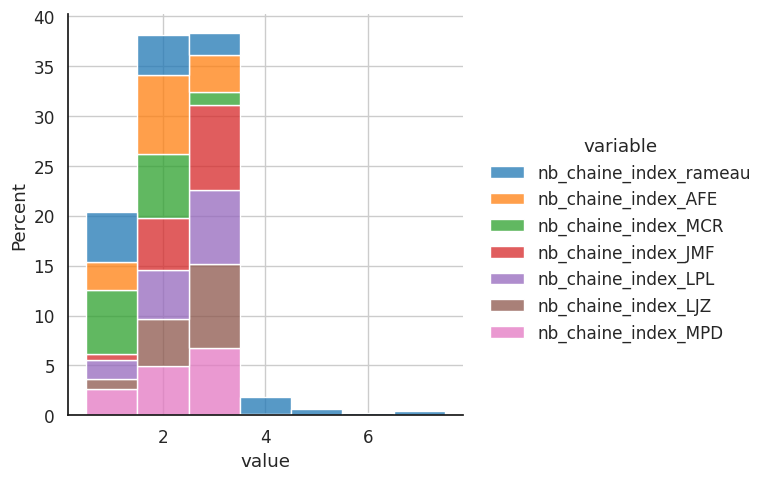

In [26]:
# Number of indexation chain
sns.displot(x="value", hue="variable", data=subset, palette="tab10", discrete=True, stat="percent", multiple="stack")

In [27]:
c = ["PPN", "TITRE", "RAMEAU"] + cols + index_columns

In [28]:
## Check for notices with more than a threshold
thres = 4
mask = df[cols] >= thres
high_nb_index_chain = df.loc[mask.sum(axis=1) >= 1, c]

In [29]:
high_nb_index_chain

PPN                                              TITRE  \
0    000308838  Les sommets de l'État : essai sur l'élite du p...   
4    05224170X  Apprendre à aimer les mathématiques : conditio...   
5    058296182                         L'homme devant l'incertain   
12   077880560  Etude du vascular endothelial growth factor (V...   
17   126056536       Tennis : soyez P.R.O. : la méthode pour oser   
23   176553460                              L'hygiène alimentaire   
31   159761875  Les sociétés coloniales à l'âge des empires : ...   
33   163093741  Le cri d'Archimède : l'art de la Découverte et...   
36   181543656  Israël entre quatre murs : la politique sécuri...   
39   183201523  L'habitat du Néolithique ancien de Colombelles...   
52   200404342  La fabrique des classiques africains : écrivai...   
67   231860838                              La justice prédictive   
68   231860838                              La justice prédictive   
79   237156989      Le photojournalisme peut-il sauver la presse    
83   248194305                                 Le travail du care   
91   255264887  Épreuves écrites du CRFPA : spécialité droit p...   
93   257349006  Vivre plus simplement : analyse sociologique d...   
94   257504990                             La nouvelle économique   
97   26117309X  Monde enchanté : chansons et imaginaires géogr...   
98   261199609  Grosse, et alors  : connaître et combattre la ...   
100  262267888  Ce que les GAFAM font aux médias africains : e...   
102  263439038  Jouer, rêver, inventer... : la créativité à l'...   
106  26753177X  Algocratie : allons-nous donner le pouvoir aux...   

                                                RAMEAU  \
0    Bureaucratie;Classes dirigeantes;Classes dirig...   
4    Mathématiques -- Étude et enseignement -- Aspe...   
5    Chaos (théorie des systèmes);Incertitude;Libre...   
12   Facteur de croissance des cellules endothélial...   
17   Performance (sports);Tennis -- Aspect psycholo...   
23   Besoins alimentaires;Digestion;Diététique;Mala...   
31   Colonies;Colonies;Colonies;Colonisation -- Asp...   
33   Créativité;Créativité en sciences;Découvertes ...   
36   Conflit israélo-arabe;Menaces;Relations milita...   
39   Antiquités;Culture à céramique linéaire;Fouill...   
52   Littérature africaine de langue française -- A...   
67   Automatisation -- Aspect moral;Droit -- Inform...   
68   Droit -- Informatique -- Aspect moral;Droit et...   
79   Journalisme électronique;Photographes de press...   
83   Aides-soignants -- Conditions de travail;Compo...   
91   Droit pénal;Obligations (droit);Procédure péna...   
93   Auto-développement (psychothérapie);Changement...   
94   Cycles économiques;Planification économique;Éc...   
97   Chansons -- Art d'écrire -- Géographie;Géograp...   
98   Corps humain -- Aspect social;Discrimination;G...   
100  Diffusion sélective de l'information;Géants du...   
102  Créativité (éducation);Créativité -- Chez l'en...   
106  Algorithmes;Changement social;Informatique -- ...   

     nb_chaine_index_rameau  nb_chaine_index_AFE  nb_chaine_index_MCR  \
0                         7                    2                    2   
4                         4                    3                    2   
5                         7                    1                    1   
12                        4                    2                    1   
17                        4                    2                    1   
23                        4                    2                    1   
31                        7                    2                    2   
33                        5                    3                    2   
36                        4                    3                    2   
39                        4                    3                    2   
52                        5                    3                    2   
67                        4                    3                    2   
68          

## Get all concepts

In [30]:
ram

PPN                              NOM
0      157992527                           Kirp?n
1      110140494              Militaires artistes
2      028492161               Militaires romains
3      028521757             Militaires prussiens
4      029895561                       Sa-skya-pa
...          ...                              ...
85871  191405949  Relations artistes-collectivité
85872  234777605         Postcolonialisme et arts
85873  193907445                           Ascèse
85874  027415074                   Vie chrétienne
85875  140430431                 Loisirs créatifs

[85876 rows x 2 columns]

In [31]:
# Mettre à plat TOUS les mots clé
pattern = r';;\s*(?![^()$]*\))| -- |-- | --|--| - '

for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_concept_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


Dealing with:  AFE
Dealing with:  MCR
Dealing with:  JMF
Dealing with:  LPL
Dealing with:  LJZ
Dealing with:  MPD


In [32]:
df.head(3)

PPN_x                                              TITRE  \
0  000308838  Les sommets de l'État : essai sur l'élite du p...   
1  00094758X                                          Le dollar   
2  003632806  Les intellectuels sous la Ve République : 1958...   

                                              RESUME  \
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...   
1  La quatrième de couverture indique : "Quelle e...   
2  Célèbres, influents, on les voit, on en parle ...   

                                              RAMEAU DEWEY  \
0  Bureaucratie;Classes dirigeantes;Classes dirig...         
1  Dollar américain;Finances internationales;Poli...   320   
2               Intellectuels;Intellectuels français   301   

                                               DESCR  \
0  Les sommets de l'État : essai sur l'élite du p...   
1  Le dollar La quatrième de couverture indique :...   
2  Les intellectuels sous la Ve République : 1958...   

   presence_chaine_indexation  \
0                       False   
1                       False   
2                       False   

                                rameau_chaines_index  \
0  [Bureaucratie, Classes dirigeantes, Classes di...   
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   

                                     rameau_concepts      PPN_y  \
0  [Bureaucratie, Classes dirigeantes, Classes di...     308838   
1  [Dollar américain, Finances internationales, P...  00094758X   
2            [Intellectuels, Intellectuels français]    3632806   

                                           INDEX_AFE      PPN_x  \
0  Classes dirigeantes -- France -- Histoire;;Pou...     308838   
1  Dollar américain;;Eurodollar, Marché de l';;Po...  00094758X   
2  Intellectuels -- France -- 1958-.... (5e Répub...    3632806   

                                           INDEX_MCR      PPN_y  \
0  Pouvoir (sciences sociales) -- Classes dirigea...  000308838   
1  Dollar américain -- Mondialisation;;Dollar amé...  00094758X   
2                    Intellectuels -- France -- 1945  003632806   

                                           INDEX_JMF      PPN_x  \
0  Classes dirigeantes -- Relations avec l'Etat -...     308838   
1  ;Dollar américain ;;Politique économique -- Ét...  00094758X   
2  Intellectuels français -- Sociologie ;;Intelle...    3632806   

                                           INDEX_LPL      PPN_y  \
0  Hauts fonctionnaires -- France;;Classes dirige...     308838   
1  Dollar américain -- Influence -- 20e siècle;;F...  00094758X   
2  Intellectuels -- France -- 1958 (5e République...    3632806   

                                           INDEX_LJZ        PPN  \
0  Classes dirigeantes -- France;;Hauts fonctionn...  000308838   
1  Dollar américain;;Eurodollar, Marché de l';;Fi...  00094758X   
2  Intellectuels -- France;;Vie intellectuelle --...  003632806   

                                           INDEX_MPD  nb_chaine_index_rameau  \
0  Classes dirigeantes -- France -- Histoire;;Éli...                       7   
1  Dollar américain;;Eurodollar, Marché de l';;Fi...                       3   
2  Intellectuels -- France -- 1958-.... (5e Répub...                       2   

   nb_chaine_index_AFE  nb_chaine_index_MCR  nb_chaine_index_JMF  \
0                    2                    2                    3   
1                    3                    2                    3   
2                    1                    1                    2   

   nb_chaine_index_LPL  nb_chaine_index_LJZ  nb_chaine_index_MPD  \
0                    3                    3                    3   
1                    3                    3                    3   
2                    2                    2                    1   

                                  rameau_concept_AFE  \
0  [Classes dirigeantes, France, Histoire, Pouvoi...   
1  [Dollar américain, Eurodollar, Marché de l', P...   
2  [Intellectuels, France, 1958-

## Format data

In [33]:
df.columns

Index(['PPN_x', 'TITRE', 'RESUME', 'RAMEAU', 'DEWEY', 'DESCR',
       'presence_chaine_indexation', 'rameau_chaines_index', 'rameau_concepts',
       'PPN_y', 'INDEX_AFE', 'PPN_x', 'INDEX_MCR', 'PPN_y', 'INDEX_JMF',
       'PPN_x', 'INDEX_LPL', 'PPN_y', 'INDEX_LJZ', 'PPN', 'INDEX_MPD',
       'nb_chaine_index_rameau', 'nb_chaine_index_AFE', 'nb_chaine_index_MCR',
       'nb_chaine_index_JMF', 'nb_chaine_index_LPL', 'nb_chaine_index_LJZ',
       'nb_chaine_index_MPD', 'rameau_concept_AFE', 'rameau_concept_MCR',
       'rameau_concept_JMF', 'rameau_concept_LPL', 'rameau_concept_LJZ',
       'rameau_concept_MPD'],
      dtype='object')

In [34]:
col_to_keep = ["PPN", "rameau_concepts", "rameau_concept_AFE",
               "rameau_concept_MCR", "rameau_concept_JMF",
                "rameau_concept_LPL", "rameau_concept_LJZ", "rameau_concept_MPD"]
df_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_pivot

PPN            variable  \
0    000308838     rameau_concepts   
1    00094758X     rameau_concepts   
2    003632806     rameau_concepts   
3    047450037     rameau_concepts   
4    05224170X     rameau_concepts   
..         ...                 ...   
765  266197809  rameau_concept_MPD   
766  26753177X  rameau_concept_MPD   
767  267884575  rameau_concept_MPD   
768  268799458  rameau_concept_MPD   
769  268924759  rameau_concept_MPD   

                                                 value  
0    [Bureaucratie, Classes dirigeantes, Classes di...  
1    [Dollar américain, Finances internationales, P...  
2              [Intellectuels, Intellectuels français]  
3                                         [Bouddhisme]  
4    [Mathématiques, Étude et enseignement, Aspect ...  
..                                                 ...  
765  [Féodalité, Histoire, Valence-en-Brie (Seine-e...  
766  [Société numérique, Algorithmes, Utilisation, ...  
767  [Capitalisme, Critique et interprétation, Dési...  
768                                  [Co-enseignement]  
769                            [Jardinage d'intérieur]  

[770 rows x 3 columns]

In [35]:
labels=df_pivot["value"]
labels

0      [Bureaucratie, Classes dirigeantes, Classes di...
1      [Dollar américain, Finances internationales, P...
2                [Intellectuels, Intellectuels français]
3                                           [Bouddhisme]
4      [Mathématiques, Étude et enseignement, Aspect ...
                             ...                        
765    [Féodalité, Histoire, Valence-en-Brie (Seine-e...
766    [Société numérique, Algorithmes, Utilisation, ...
767    [Capitalisme, Critique et interprétation, Dési...
768                                    [Co-enseignement]
769                              [Jardinage d'intérieur]
Name: value, Length: 770, dtype: object

In [36]:
def flatten(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list

In [37]:
keywords = flatten(labels)
print(f"Le dataset contient {len(set(keywords))} concepts RAMEAU differents")

Le dataset contient 1033 concepts RAMEAU differents


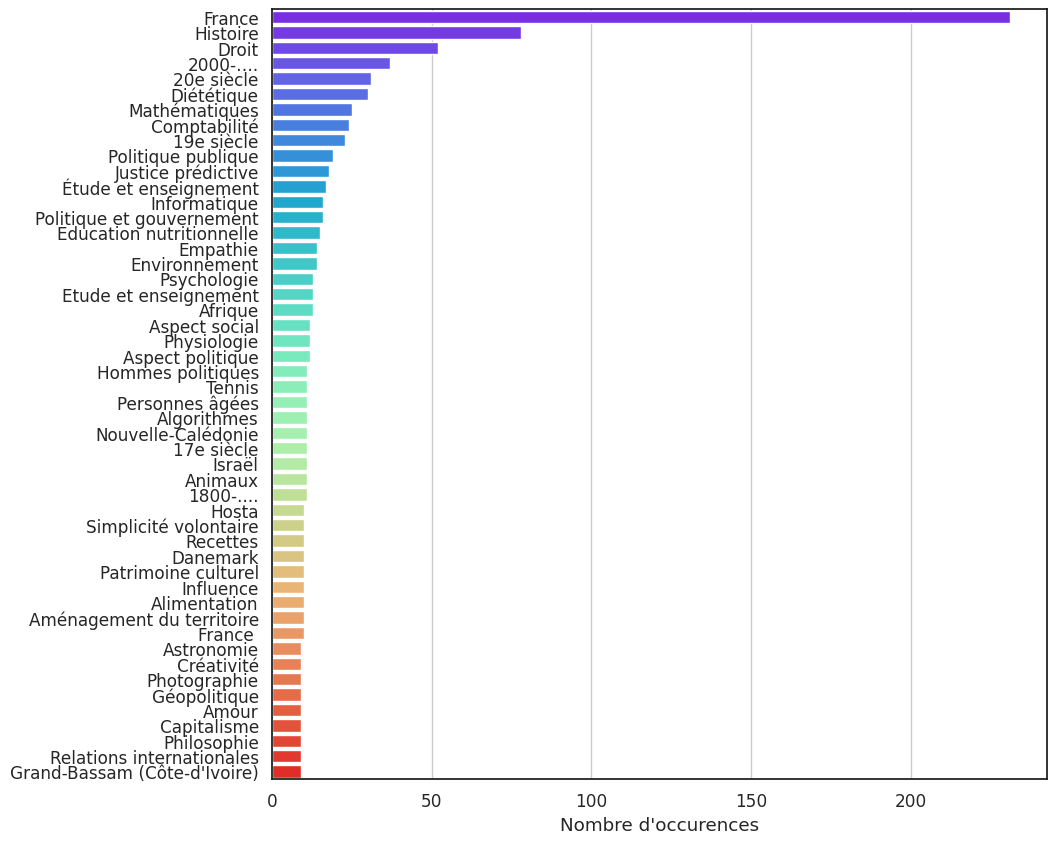

In [38]:
plot_barplot_of_tags(
    keywords,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_concept_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

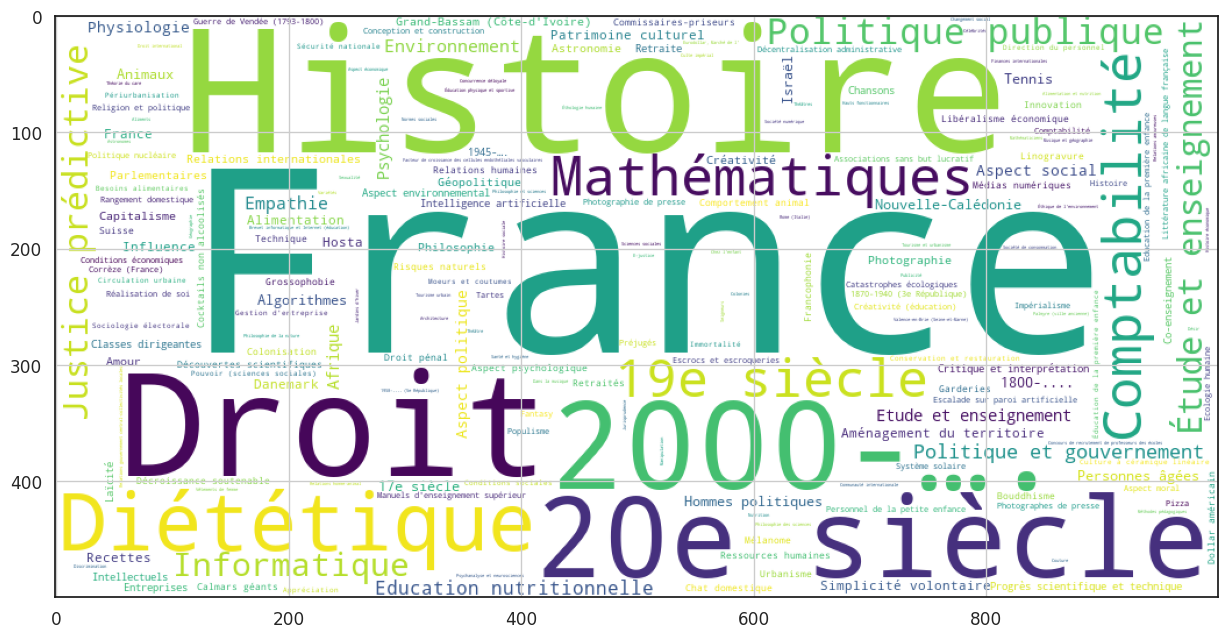

In [39]:
plot_wordcloud(
    keywords,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_reindexation.png",
)

In [40]:
all_concepts = df["rameau_concepts"] + df["rameau_concept_AFE"] + df["rameau_concept_MCR"] + df["rameau_concept_JMF"] + df["rameau_concept_LPL"] + df["rameau_concept_LJZ"]	+ df["rameau_concept_MPD"]
keywords2 = flatten(all_concepts)
print(f"Le dataset contient {len(set(keywords2))} concepts RAMEAU differents")

Le dataset contient 1033 concepts RAMEAU differents


In [41]:
# Verification que toutes les vedettes appartiennent au referenciel RAMEAU
RAMEAU = ram["NOM"].to_list()
keywords = list(map(lambda x: x.lstrip().rstrip(), keywords)) 
if all([item in RAMEAU for item in keywords]):
    print("Tous les mots clés sont des concepts rameau")
else:
    check = [item in RAMEAU for item in keywords]
    bad_keywords = []
    for i in range(len(check)):
        if not check[i]:
            bad_keywords.append(keywords[i])
 
    unknown_concepts = list(set(bad_keywords))
    print(f"{len(unknown_concepts)} mots clés absents du répertoire RAMEAU sur un total de {len(set(keywords))}")

254 mots clés absents du répertoire RAMEAU sur un total de 958


In [42]:
# Save list of badly formatted concepts, for check
with open(os.path.join(data_path, "concepts_a_verifier.txt"), "w") as output:
    output.write(str(unknown_concepts))
unknown_concepts

['',
 'Art, vente aux enchères',
 '30 av. J.-C.-284',
 'aspect social',
 ';Dollar américain',
 'Campagnes et batailles',
 'Ecrivains africains de la langue française',
 'Afrique francophone',
 'Photographies de presse',
 'Afrique subsaharienne',
 'Nucléaire',
 'Littérature',
 'Education de la première enfance',
 'Etats financiers',
 'Ecologie des eaux',
 "Politique de l'environnement$3027466655$xPrise de décision",
 'Colonialisme et ethnologie',
 '1900-1945',
 'Méthodes expérimentales',
 '1945-….',
 'Louvain (Belgique)',
 'Etude et enseignement',
 'Colombelles (Calvados)',
 'Jusrisprudence',
 'Responsabilité Sociétale',
 'Construction et conception',
 '1988-....',
 'Extémisme (politique)',
 "Angers, Massacres d'(1793-1794)",
 'Aspect religieux',
 'Anecdotes',
 'Art, commerce',
 'Personnels',
 'collectivités locales',
 'Littérature française pour la jeunesse',
 'environnement',
 '1870-1914',
 'Epistémologie',
 '1990-2020',
 'Mouvement anti-nucléaire',
 'Histoire et fiction',
 '19e siècl

In [43]:
print(labels[0])
print(all_concepts[0])

['Bureaucratie', 'Classes dirigeantes', 'Classes dirigeantes', 'Hauts fonctionnaires', 'Hommes politiques', 'Pouvoir (sciences sociales)', 'Pratiques politiques']
['Bureaucratie', 'Classes dirigeantes', 'Classes dirigeantes', 'Hauts fonctionnaires', 'Hommes politiques', 'Pouvoir (sciences sociales)', 'Pratiques politiques', 'Classes dirigeantes', 'France', 'Histoire', 'Pouvoir communautaire', 'France', 'Pouvoir (sciences sociales)', 'Classes dirigeantes ', 'Élite (sciences sociales)', 'Hauts fonctionnaires', 'Classes dirigeantes', "Relations avec l'Etat", 'France  ', 'Construction nationale', 'France ', 'Leadership politique', 'France', 'Histoire', 'Hauts fonctionnaires', 'France', 'Classes dirigeantes', 'France', '19e siècle', 'Classes dirigeantes', 'France', '20e siècle', 'Classes dirigeantes', 'France', 'Hauts fonctionnaires', 'France', 'Relations gouvernement central-collectivités locales', 'France', 'Classes dirigeantes', 'France', 'Histoire', 'Élite (sciences sociales)', 'Hauts f

# Multilabel classification

## By Concepts

In [44]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [45]:
# Binarization
concepts = mlb.fit_transform(all_concepts) # all_concepts
concepts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
sudoc = mlb.transform(df.loc[:10,"rameau_concepts"])
afe = mlb.transform(df.loc[:10,"rameau_concept_AFE"])
mcr = mlb.transform(df.loc[:10,"rameau_concept_MCR"])
jmf = mlb.transform(df.loc[:10,"rameau_concept_JMF"])
lpl = mlb.transform(df.loc[:10,"rameau_concept_LPL"])
ljz = mlb.transform(df.loc[:10,"rameau_concept_LJZ"])
mpd = mlb.transform(df.loc[:10,"rameau_concept_MPD"])

In [47]:
from itertools import combinations_with_replacement

concept_list = [sudoc, afe, mcr, jmf, lpl, ljz, mpd]
index_name = ["sudoc", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
results = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    results[name] = label_metrics_report("reindexation_concepts", concept[0], concept[1], zero_division=0)

comparing sudoc and  sudoc
comparing sudoc and  afe
comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd
comparing mcr and  mcr
comparing mcr and  jmf
comparing mcr and  lpl
comparing mcr and  ljz
comparing mcr and  mpd
comparing jmf and  jmf
comparing jmf and  lpl
comparing jmf and  ljz
comparing jmf and  mpd
comparing lpl and  lpl
comparing lpl and  ljz
comparing lpl and  mpd
comparing ljz and  ljz
comparing ljz and  mpd
comparing mpd and  mpd


### Dataframe of results

In [48]:
result_df = pd.DataFrame(results).T
result_df

Hamming Loss  Accuracy Precision - Macro Recall - Macro  \
sudoc-sudoc          0.0       1.0          0.031946       0.031946   
sudoc-afe       0.004312  0.090909          0.009681       0.009681   
sudoc-mcr        0.00396  0.090909          0.007744       0.007744   
sudoc-jmf       0.006336       0.0          0.007744       0.007744   
sudoc-lpl       0.004136       0.0          0.014037       0.013069   
sudoc-ljz       0.005016       0.0          0.008712       0.008712   
sudoc-mpd       0.003784  0.181818          0.014682       0.015005   
afe-afe              0.0       1.0           0.03001        0.03001   
afe-mcr         0.004224  0.090909          0.005808        0.00484   
afe-jmf         0.005016       0.0          0.011617       0.012585   
afe-lpl         0.003872       0.0          0.013553       0.013553   
afe-ljz         0.002992       0.0          0.016941       0.016941   
afe-mpd         0.002992  0.181818          0.017425       0.018393   
mcr-mcr              0.0       1.0          0.025169       0.025169   
mcr-jmf         0.006072       0.0          0.003872        0.00484   
mcr-lpl         0.004048       0.0          0.009681       0.010165   
mcr-ljz         0.004576       0.0          0.006292       0.006776   
mcr-mpd         0.004576  0.090909          0.006373       0.007744   
jmf-jmf              0.0       1.0          0.047435       0.047435   
jmf-lpl         0.006072       0.0          0.010165       0.009681   
jmf-ljz         0.005368       0.0          0.012585       0.012585   
jmf-mpd         0.005016       0.0          0.015489       0.015489   
lpl-lpl              0.0       1.0          0.035818       0.035818   
lpl-ljz         0.004576       0.0          0.012101       0.012585   
lpl-mpd         0.004224       0.0          0.013875       0.015005   
ljz-ljz              0.0       1.0          0.035818       0.035818   
ljz-mpd         0.003872  0.090909          0.015973       0.015973   
mpd-mpd              0.0       1.0          0.033882       0.033882   

            F1_Score - Macro Jaccard - Macro Precision - Sample  \
sudoc-sudoc         0.031946        0.031946                1.0   
sudoc-afe           0.009681        0.009681           0.401515   
sudoc-mcr           0.007744        0.007744           0.386364   
sudoc-jmf           0.007744        0.007744           0.151623   
sudoc-lpl           0.013391        0.012907           0.365152   
sudoc-ljz           0.008712        0.008712           0.287879   
sudoc-mpd           0.014811        0.014521           0.507576   
afe-afe              0.03001         0.03001                1.0   
afe-mcr             0.005163         0.00484               0.25   
afe-jmf             0.011939        0.011617           0.238853   
afe-lpl             0.013553        0.013553           0.383333   
afe-ljz              0.01678        0.016457           0.478355   
afe-mpd             0.017748        0.017425           0.545455   
mcr-mcr             0.025169        0.025169                1.0   
mcr-jmf             0.004195        0.003872           0.094805   
mcr-lpl             0.009681        0.009197           0.256061   
mcr-ljz             0.006454        0.006292           0.219697   
mcr-mpd              0.00668        0.006373           0.272727   
jmf-jmf             0.047435        0.047435                1.0   
jmf-lpl             0.009842        0.009519           0.283333   
jmf-ljz             0.012585        0.012585           0.369264   
jmf-mpd             0.015328        0.014843           0.401515   
lpl-lpl             0.035818        0.035818                1.0   
lpl-ljz             0.012262        0.012101           0.362987   
lpl-mpd             0.014198        0.013714           0.492424   
ljz-ljz             0.035818        0.035818                1.0   
ljz-mpd             0.015812        0.015489           0.477273   
mpd-mpd             0.033882        0.033882                1.0   

        

In [49]:
# Get max score
result_df.sort_values(by="Hamming Loss")

Hamming Loss  Accuracy Precision - Macro Recall - Macro  \
sudoc-sudoc          0.0       1.0          0.031946       0.031946   
ljz-ljz              0.0       1.0          0.035818       0.035818   
lpl-lpl              0.0       1.0          0.035818       0.035818   
jmf-jmf              0.0       1.0          0.047435       0.047435   
afe-afe              0.0       1.0           0.03001        0.03001   
mcr-mcr              0.0       1.0          0.025169       0.025169   
mpd-mpd              0.0       1.0          0.033882       0.033882   
afe-mpd         0.002992  0.181818          0.017425       0.018393   
afe-ljz         0.002992       0.0          0.016941       0.016941   
sudoc-mpd       0.003784  0.181818          0.014682       0.015005   
afe-lpl         0.003872       0.0          0.013553       0.013553   
ljz-mpd         0.003872  0.090909          0.015973       0.015973   
sudoc-mcr        0.00396  0.090909          0.007744       0.007744   
mcr-lpl         0.004048       0.0          0.009681       0.010165   
sudoc-lpl       0.004136       0.0          0.014037       0.013069   
afe-mcr         0.004224  0.090909          0.005808        0.00484   
lpl-mpd         0.004224       0.0          0.013875       0.015005   
sudoc-afe       0.004312  0.090909          0.009681       0.009681   
lpl-ljz         0.004576       0.0          0.012101       0.012585   
mcr-ljz         0.004576       0.0          0.006292       0.006776   
mcr-mpd         0.004576  0.090909          0.006373       0.007744   
jmf-mpd         0.005016       0.0          0.015489       0.015489   
afe-jmf         0.005016       0.0          0.011617       0.012585   
sudoc-ljz       0.005016       0.0          0.008712       0.008712   
jmf-ljz         0.005368       0.0          0.012585       0.012585   
mcr-jmf         0.006072       0.0          0.003872        0.00484   
jmf-lpl         0.006072       0.0          0.010165       0.009681   
sudoc-jmf       0.006336       0.0          0.007744       0.007744   

            F1_Score - Macro Jaccard - Macro Precision - Sample  \
sudoc-sudoc         0.031946        0.031946                1.0   
ljz-ljz             0.035818        0.035818                1.0   
lpl-lpl             0.035818        0.035818                1.0   
jmf-jmf             0.047435        0.047435                1.0   
afe-afe              0.03001         0.03001                1.0   
mcr-mcr             0.025169        0.025169                1.0   
mpd-mpd             0.033882        0.033882                1.0   
afe-mpd             0.017748        0.017425           0.545455   
afe-ljz              0.01678        0.016457           0.478355   
sudoc-mpd           0.014811        0.014521           0.507576   
afe-lpl             0.013553        0.013553           0.383333   
ljz-mpd             0.015812        0.015489           0.477273   
sudoc-mcr           0.007744        0.007744           0.386364   
mcr-lpl             0.009681        0.009197           0.256061   
sudoc-lpl           0.013391        0.012907           0.365152   
afe-mcr             0.005163         0.00484               0.25   
lpl-mpd             0.014198        0.013714           0.492424   
sudoc-afe           0.009681        0.009681           0.401515   
lpl-ljz             0.012262        0.012101           0.362987   
mcr-ljz             0.006454        0.006292           0.219697   
mcr-mpd              0.00668        0.006373           0.272727   
jmf-mpd             0.015328        0.014843           0.401515   
afe-jmf             0.011939        0.011617           0.238853   
sudoc-ljz           0.008712        0.008712           0.287879   
jmf-ljz             0.012585        0.012585           0.369264   
mcr-jmf             0.004195        0.003872           0.094805   
jmf-lpl             0.009842        0.009519           0.283333   
sudoc-jmf           0.007744        0.007744           0.151623   

        

### Plot

In [50]:
# Plot results
metrics_radar_plot(
    result_df,
    title="Quantitative comparisons, Scaled, without identity",
    savefig="metrics_reindexation_without_identity.html",)

In [51]:
metrics_radar_plot(
    result_df, 
    remove_identity=False, 
    title="Quantitative comparisons, Scaled, with identity",
    savefig="metrics_reindexation.html",)

/home/aurelie/ABES/labo-indexation-ai/utils_visualization.py:129: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aurelie/ABES/labo-indexation-ai/utils_visualization.py:130: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## By indexation Chains

### Get indexation chains

In [52]:
# Mettre à plat TOUTES les chaines d'indexation
pattern = r';;\s*(?![^()$]*\))'

for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_index_chain_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


Dealing with:  AFE
Dealing with:  MCR
Dealing with:  JMF
Dealing with:  LPL
Dealing with:  LJZ
Dealing with:  MPD


In [53]:
df.head(3)

PPN_x                                              TITRE  \
0  000308838  Les sommets de l'État : essai sur l'élite du p...   
1  00094758X                                          Le dollar   
2  003632806  Les intellectuels sous la Ve République : 1958...   

                                              RESUME  \
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...   
1  La quatrième de couverture indique : "Quelle e...   
2  Célèbres, influents, on les voit, on en parle ...   

                                              RAMEAU DEWEY  \
0  Bureaucratie;Classes dirigeantes;Classes dirig...         
1  Dollar américain;Finances internationales;Poli...   320   
2               Intellectuels;Intellectuels français   301   

                                               DESCR  \
0  Les sommets de l'État : essai sur l'élite du p...   
1  Le dollar La quatrième de couverture indique :...   
2  Les intellectuels sous la Ve République : 1958...   

   presence_chaine_indexation  \
0                       False   
1                       False   
2                       False   

                                rameau_chaines_index  \
0  [Bureaucratie, Classes dirigeantes, Classes di...   
1  [Dollar américain, Finances internationales, P...   
2            [Intellectuels, Intellectuels français]   

                                     rameau_concepts      PPN_y  \
0  [Bureaucratie, Classes dirigeantes, Classes di...     308838   
1  [Dollar américain, Finances internationales, P...  00094758X   
2            [Intellectuels, Intellectuels français]    3632806   

                                           INDEX_AFE      PPN_x  \
0  Classes dirigeantes -- France -- Histoire;;Pou...     308838   
1  Dollar américain;;Eurodollar, Marché de l';;Po...  00094758X   
2  Intellectuels -- France -- 1958-.... (5e Répub...    3632806   

                                           INDEX_MCR      PPN_y  \
0  Pouvoir (sciences sociales) -- Classes dirigea...  000308838   
1  Dollar américain -- Mondialisation;;Dollar amé...  00094758X   
2                    Intellectuels -- France -- 1945  003632806   

                                           INDEX_JMF      PPN_x  \
0  Classes dirigeantes -- Relations avec l'Etat -...     308838   
1  ;Dollar américain ;;Politique économique -- Ét...  00094758X   
2  Intellectuels français -- Sociologie ;;Intelle...    3632806   

                                           INDEX_LPL      PPN_y  \
0  Hauts fonctionnaires -- France;;Classes dirige...     308838   
1  Dollar américain -- Influence -- 20e siècle;;F...  00094758X   
2  Intellectuels -- France -- 1958 (5e République...    3632806   

                                           INDEX_LJZ        PPN  \
0  Classes dirigeantes -- France;;Hauts fonctionn...  000308838   
1  Dollar américain;;Eurodollar, Marché de l';;Fi...  00094758X   
2  Intellectuels -- France;;Vie intellectuelle --...  003632806   

                                           INDEX_MPD  nb_chaine_index_rameau  \
0  Classes dirigeantes -- France -- Histoire;;Éli...                       7   
1  Dollar américain;;Eurodollar, Marché de l';;Fi...                       3   
2  Intellectuels -- France -- 1958-.... (5e Répub...                       2   

   nb_chaine_index_AFE  nb_chaine_index_MCR  nb_chaine_index_JMF  \
0                    2                    2                    3   
1                    3                    2                    3   
2                    1                    1                    2   

   nb_chaine_index_LPL  nb_chaine_index_LJZ  nb_chaine_index_MPD  \
0                    3                    3                    3   
1                    3                    3                    3   
2                    2                    2                    1   

                                  rameau_concept_AFE  \
0  [Classes dirigeantes, France, Histoire, Pouvoi...   
1  [Dollar américain, Eurodollar, Marché de l', P...   
2  [Intellectuels, France, 1958-

## Format data

In [54]:
col_to_keep = ["PPN", "rameau_chaines_index", "rameau_index_chain_AFE",
               "rameau_index_chain_MCR", "rameau_index_chain_JMF",
                "rameau_index_chain_LPL", "rameau_index_chain_LJZ", "rameau_index_chain_MPD"]
df_index_chain_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_index_chain_pivot

PPN                variable  \
0    000308838    rameau_chaines_index   
1    00094758X    rameau_chaines_index   
2    003632806    rameau_chaines_index   
3    047450037    rameau_chaines_index   
4    05224170X    rameau_chaines_index   
..         ...                     ...   
765  266197809  rameau_index_chain_MPD   
766  26753177X  rameau_index_chain_MPD   
767  267884575  rameau_index_chain_MPD   
768  268799458  rameau_index_chain_MPD   
769  268924759  rameau_index_chain_MPD   

                                                 value  
0    [Bureaucratie, Classes dirigeantes, Classes di...  
1    [Dollar américain, Finances internationales, P...  
2              [Intellectuels, Intellectuels français]  
3                                         [Bouddhisme]  
4    [Mathématiques -- Étude et enseignement -- Asp...  
..                                                 ...  
765  [Féodalité -- Histoire -- Valence-en-Brie (Sei...  
766  [Société numérique, Algorithmes -- Utilisation...  
767  [Capitalisme -- Critique et interprétation, Dé...  
768                                  [Co-enseignement]  
769                            [Jardinage d'intérieur]  

[770 rows x 3 columns]

In [55]:
chains=df_index_chain_pivot["value"]
chains

0      [Bureaucratie, Classes dirigeantes, Classes di...
1      [Dollar américain, Finances internationales, P...
2                [Intellectuels, Intellectuels français]
3                                           [Bouddhisme]
4      [Mathématiques -- Étude et enseignement -- Asp...
                             ...                        
765    [Féodalité -- Histoire -- Valence-en-Brie (Sei...
766    [Société numérique, Algorithmes -- Utilisation...
767    [Capitalisme -- Critique et interprétation, Dé...
768                                    [Co-enseignement]
769                              [Jardinage d'intérieur]
Name: value, Length: 770, dtype: object

In [56]:
index_chains = flatten(chains)
print(f"Le dataset contient {len(set(index_chains))} chaines d'indexation differentes")

Le dataset contient 1218 chaines d'indexation differentes


In [57]:
# remove strange characters
index_chains2 = [x.lstrip(r";|''").rstrip(r";|''") for x in index_chains]
print(f"Le dataset contient {len(set(index_chains2))} chaines d'indexation differentes")

Le dataset contient 1217 chaines d'indexation differentes


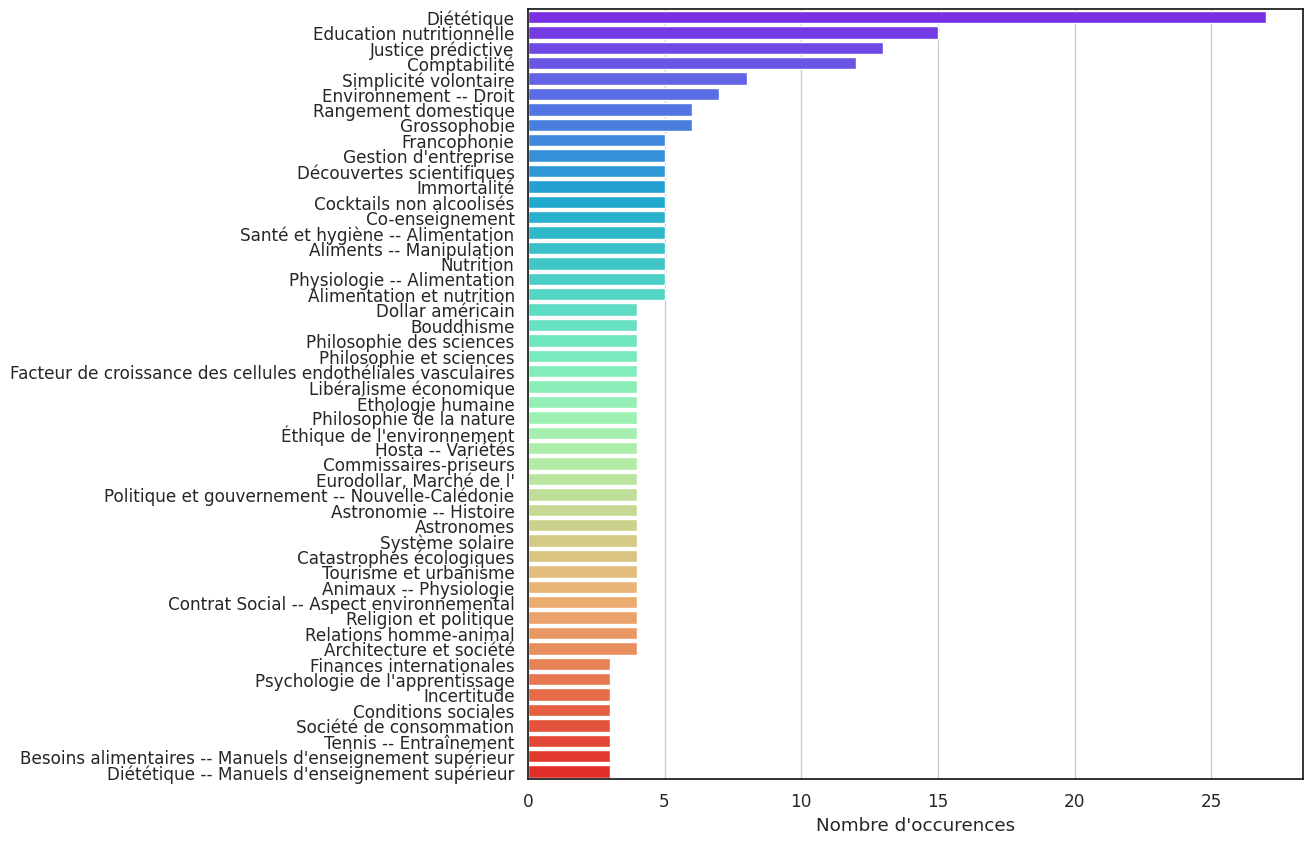

In [58]:
plot_barplot_of_tags(
    index_chains,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_indexationChains_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

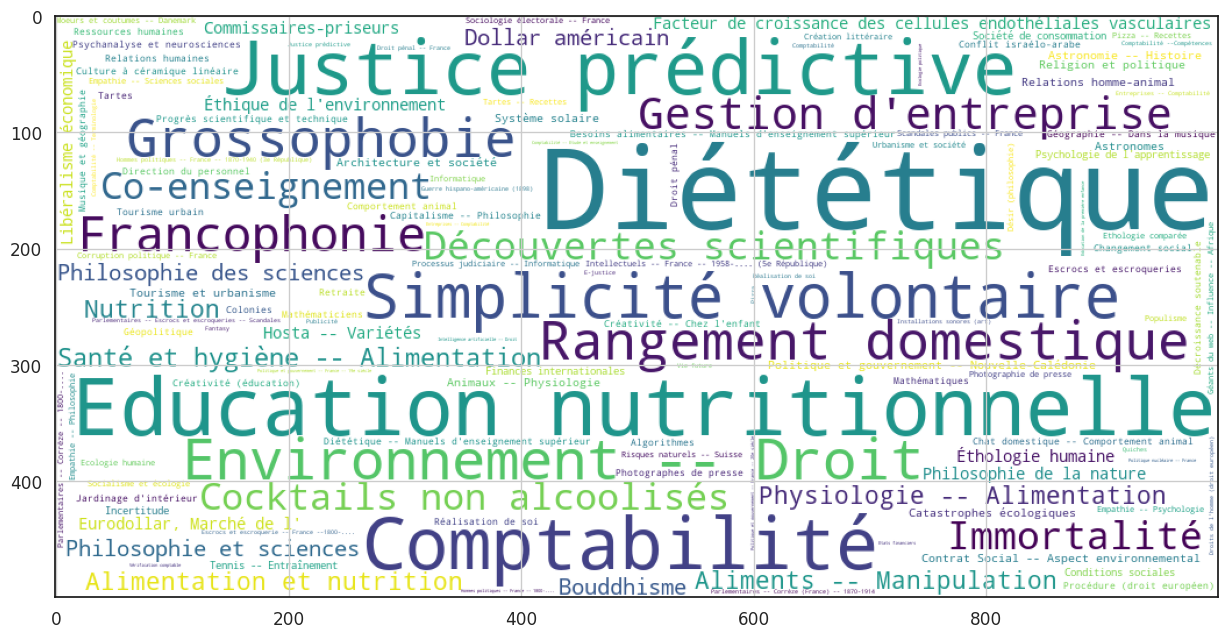

In [59]:
plot_wordcloud(
    index_chains,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_index_chains_reindexation.png",
)

In [60]:
all_chains = df["rameau_chaines_index"] + df["rameau_index_chain_AFE"] + df["rameau_index_chain_MCR"] + df["rameau_index_chain_JMF"] + df["rameau_index_chain_LPL"] + df["rameau_index_chain_LJZ"]	+ df["rameau_index_chain_MPD"]
chains2 = flatten(all_chains)
print(f"Le dataset contient {len(set(chains2))} concepts RAMEAU differents")

Le dataset contient 1218 concepts RAMEAU differents


In [61]:
# Binarization
index_chains_rameau = mlb.fit_transform(all_chains) # all indexation chains
index_chains_rameau

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
sudoc = mlb.transform(df["rameau_chaines_index"])
afe = mlb.transform(df["rameau_index_chain_AFE"])
mcr = mlb.transform(df["rameau_index_chain_MCR"])
jmf = mlb.transform(df["rameau_index_chain_JMF"])
lpl = mlb.transform(df["rameau_index_chain_LPL"])
ljz = mlb.transform(df["rameau_index_chain_LJZ"])
mpd = mlb.transform(df["rameau_index_chain_MPD"])

In [63]:
from itertools import combinations_with_replacement

concept_list = [sudoc, afe, mcr, jmf, lpl, ljz, mpd]
index_name = ["sudoc", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
result_chains = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    result_chains[name] = label_metrics_report("reindexation_chains", concept[0], concept[1], zero_division=0)

comparing sudoc and  sudoc
comparing sudoc and  afe
comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd
comparing mcr and  mcr
comparing mcr and  jmf
comparing mcr and  lpl
comparing mcr and  ljz
comparing mcr and  mpd
comparing jmf and  jmf
comparing jmf and  lpl
comparing jmf and  ljz
comparing jmf and  mpd
comparing lpl and  lpl
comparing lpl and  ljz
comparing lpl and  mpd
comparing ljz and  ljz
comparing ljz and  mpd
comparing mpd and  mpd


### Dataframe of results

In [64]:
result_chains_df = pd.DataFrame(result_chains).T
result_chains_df

Hamming Loss  Accuracy Precision - Macro Recall - Macro  \
sudoc-sudoc          0.0       1.0           0.19376        0.19376   
sudoc-afe        0.00318  0.027273          0.019212       0.019704   
sudoc-mcr       0.003053  0.027273          0.009442       0.009442   
sudoc-jmf        0.00362  0.009091          0.019622       0.020525   
sudoc-lpl       0.003366  0.036364          0.025164       0.025588   
sudoc-ljz       0.003553  0.009091          0.020033       0.020525   
sudoc-mpd       0.003097  0.063636          0.035222       0.035851   
afe-afe              0.0       1.0          0.169951       0.169951   
afe-mcr         0.002814  0.054545          0.010673       0.010673   
afe-jmf         0.003426  0.009091          0.016831       0.017241   
afe-lpl         0.003112  0.009091          0.022167       0.021894   
afe-ljz         0.003015  0.009091          0.031199        0.03202   
afe-mpd         0.002605  0.072727           0.04803       0.048166   
mcr-mcr              0.0       1.0          0.136289       0.136289   
mcr-jmf         0.003359       0.0          0.004516       0.004926   
mcr-lpl         0.003224       0.0          0.004105       0.003695   
mcr-ljz         0.003277       0.0          0.006568       0.006568   
mcr-mpd         0.003015  0.018182          0.011494       0.011494   
jmf-jmf              0.0       1.0          0.211002       0.211002   
jmf-lpl         0.003732  0.009091          0.014778       0.014778   
jmf-ljz         0.003814  0.009091          0.016831       0.016831   
jmf-mpd         0.003508  0.009091          0.022167       0.022167   
lpl-lpl              0.0       1.0          0.189655       0.189655   
lpl-ljz         0.003501  0.009091          0.021894       0.022167   
lpl-mpd         0.002986  0.045455          0.042693       0.042693   
ljz-ljz              0.0       1.0           0.20197        0.20197   
ljz-mpd         0.003336  0.018182          0.029146       0.028872   
mpd-mpd              0.0       1.0          0.186371       0.186371   

            F1_Score - Macro Jaccard - Macro Precision - Sample  \
sudoc-sudoc          0.19376         0.19376                1.0   
sudoc-afe           0.019353        0.019212            0.15303   
sudoc-mcr           0.009305        0.009031           0.086364   
sudoc-jmf             0.0199        0.019622           0.095455   
sudoc-lpl            0.02499         0.02448           0.137879   
sudoc-ljz           0.020174        0.020033           0.109091   
sudoc-mpd           0.035335        0.034948           0.212121   
afe-afe             0.169951        0.169951                1.0   
afe-mcr             0.010673        0.010673           0.098485   
afe-jmf             0.016968        0.016831                0.1   
afe-lpl             0.022003        0.021894           0.143939   
afe-ljz             0.031472        0.031199           0.168939   
afe-mpd             0.048002        0.047756           0.277273   
mcr-mcr             0.136289        0.136289                1.0   
mcr-jmf             0.004652        0.004516           0.021212   
mcr-lpl             0.003831        0.003695           0.021212   
mcr-ljz             0.006568        0.006568           0.033333   
mcr-mpd             0.011494        0.011494           0.059091   
jmf-jmf             0.211002        0.211002                1.0   
jmf-lpl             0.014778        0.014778            0.09697   
jmf-ljz             0.016831        0.016694            0.10303   
jmf-mpd             0.022167        0.022167            0.14697   
lpl-lpl             0.189655        0.189655                1.0   
lpl-ljz             0.022003        0.021894           0.121212   
lpl-mpd             0.042693        0.042693           0.230303   
ljz-ljz              0.20197         0.20197                1.0   
ljz-mpd             0.028982        0.028736           0.181818   
mpd-mpd             0.186371        0.186371                1.0   

        

In [65]:
# Get max score
result_chains_df.sort_values(by="Hamming Loss")

Hamming Loss  Accuracy Precision - Macro Recall - Macro  \
sudoc-sudoc          0.0       1.0           0.19376        0.19376   
ljz-ljz              0.0       1.0           0.20197        0.20197   
lpl-lpl              0.0       1.0          0.189655       0.189655   
jmf-jmf              0.0       1.0          0.211002       0.211002   
afe-afe              0.0       1.0          0.169951       0.169951   
mcr-mcr              0.0       1.0          0.136289       0.136289   
mpd-mpd              0.0       1.0          0.186371       0.186371   
afe-mpd         0.002605  0.072727           0.04803       0.048166   
afe-mcr         0.002814  0.054545          0.010673       0.010673   
lpl-mpd         0.002986  0.045455          0.042693       0.042693   
mcr-mpd         0.003015  0.018182          0.011494       0.011494   
afe-ljz         0.003015  0.009091          0.031199        0.03202   
sudoc-mcr       0.003053  0.027273          0.009442       0.009442   
sudoc-mpd       0.003097  0.063636          0.035222       0.035851   
afe-lpl         0.003112  0.009091          0.022167       0.021894   
sudoc-afe        0.00318  0.027273          0.019212       0.019704   
mcr-lpl         0.003224       0.0          0.004105       0.003695   
mcr-ljz         0.003277       0.0          0.006568       0.006568   
ljz-mpd         0.003336  0.018182          0.029146       0.028872   
mcr-jmf         0.003359       0.0          0.004516       0.004926   
sudoc-lpl       0.003366  0.036364          0.025164       0.025588   
afe-jmf         0.003426  0.009091          0.016831       0.017241   
lpl-ljz         0.003501  0.009091          0.021894       0.022167   
jmf-mpd         0.003508  0.009091          0.022167       0.022167   
sudoc-ljz       0.003553  0.009091          0.020033       0.020525   
sudoc-jmf        0.00362  0.009091          0.019622       0.020525   
jmf-lpl         0.003732  0.009091          0.014778       0.014778   
jmf-ljz         0.003814  0.009091          0.016831       0.016831   

            F1_Score - Macro Jaccard - Macro Precision - Sample  \
sudoc-sudoc          0.19376         0.19376                1.0   
ljz-ljz              0.20197         0.20197                1.0   
lpl-lpl             0.189655        0.189655                1.0   
jmf-jmf             0.211002        0.211002                1.0   
afe-afe             0.169951        0.169951                1.0   
mcr-mcr             0.136289        0.136289                1.0   
mpd-mpd             0.186371        0.186371                1.0   
afe-mpd             0.048002        0.047756           0.277273   
afe-mcr             0.010673        0.010673           0.098485   
lpl-mpd             0.042693        0.042693           0.230303   
mcr-mpd             0.011494        0.011494           0.059091   
afe-ljz             0.031472        0.031199           0.168939   
sudoc-mcr           0.009305        0.009031           0.086364   
sudoc-mpd           0.035335        0.034948           0.212121   
afe-lpl             0.022003        0.021894           0.143939   
sudoc-afe           0.019353        0.019212            0.15303   
mcr-lpl             0.003831        0.003695           0.021212   
mcr-ljz             0.006568        0.006568           0.033333   
ljz-mpd             0.028982        0.028736           0.181818   
mcr-jmf             0.004652        0.004516           0.021212   
sudoc-lpl            0.02499         0.02448           0.137879   
afe-jmf             0.016968        0.016831                0.1   
lpl-ljz             0.022003        0.021894           0.121212   
jmf-mpd             0.022167        0.022167            0.14697   
sudoc-ljz           0.020174        0.020033           0.109091   
sudoc-jmf             0.0199        0.019622           0.095455   
jmf-lpl             0.014778        0.014778            0.09697   
jmf-ljz             0.016831        0.016694            0.10303   

        

### Plot

In [66]:
# Plot results
metrics_radar_plot(
    result_chains_df,
    title="Quantitative comparisons, Chains indexation, Scaled, without identity",
    savefig="metrics_reindexation_Chains_without_identity.html",)

## Bag of words (tf-idf or CountVectorizer)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### tfID vectorizer

In [69]:
def identity_tokenizer(text):
    return text
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)

In [70]:
labels

0      [Bureaucratie, Classes dirigeantes, Classes di...
1      [Dollar américain, Finances internationales, P...
2                [Intellectuels, Intellectuels français]
3                                           [Bouddhisme]
4      [Mathématiques, Étude et enseignement, Aspect ...
                             ...                        
765    [Féodalité, Histoire, Valence-en-Brie (Seine-e...
766    [Société numérique, Algorithmes, Utilisation, ...
767    [Capitalisme, Critique et interprétation, Dési...
768                                    [Co-enseignement]
769                              [Jardinage d'intérieur]
Name: value, Length: 770, dtype: object

In [71]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels)
autorites = vectorizer.get_feature_names_out()
autorites

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array(['', ' Le Lazzaro (Calvados ; site archéologique)',
       '1500-.... (Période moderne)', ...,
       'Île-de-France (France) 1945-1970',
       "Île-de-France (France) 1945-1970 Constructions d'urgence",
       'Île-de-France (France) 1945-1970 Habitations individuelles'],
      dtype=object)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

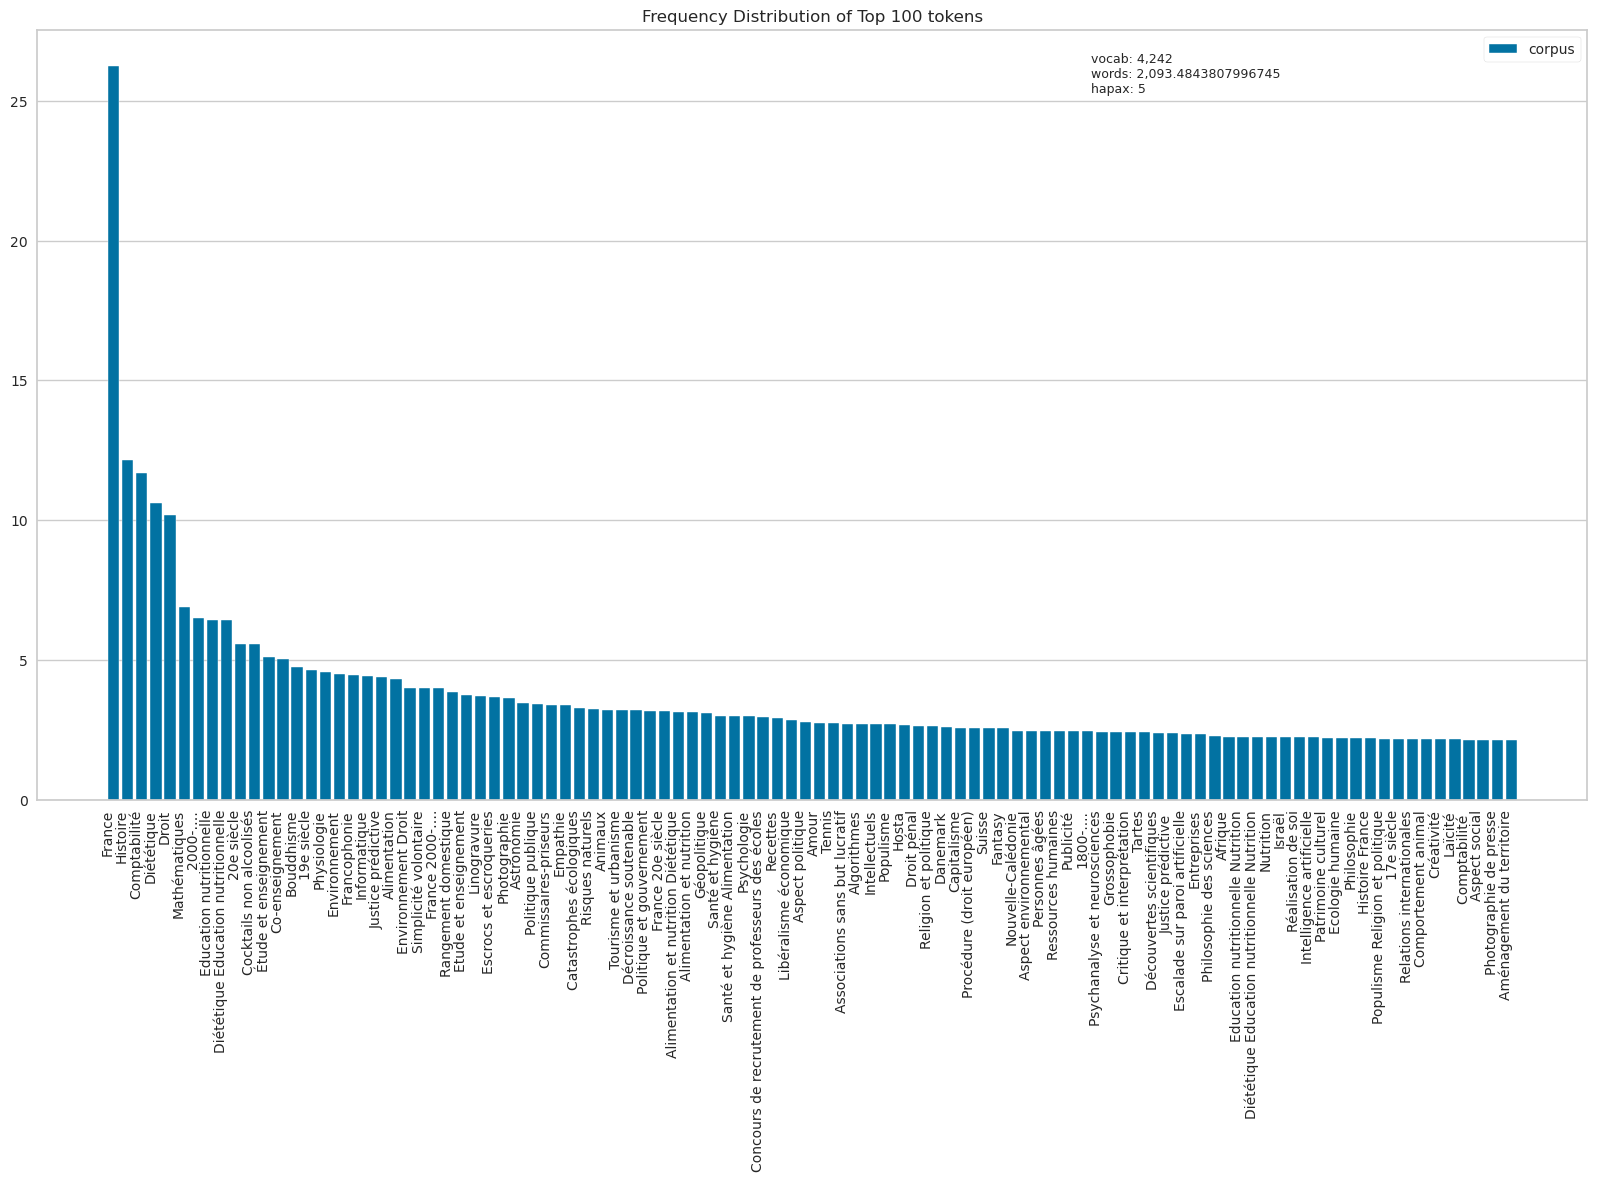

<Axes: title={'center': 'Frequency Distribution of Top 100 tokens'}>

In [72]:
from yellowbrick.text import FreqDistVisualizer
plt.figure(figsize=(20, 10))
features = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, n=100, orient="v")
visualizer.fit(vectorised_concepts)
visualizer.show()

In [73]:
# Visualize the dataset with T-SNE
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

### Count vectorizer

In [ ]:
vectorizer = CountVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)
vectorised_concepts = vectorizer.fit_transform(df_pivot["value"])

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels, df_pivot["variable"])
autorites = vectorizer.get_feature_names_out()
autorites

/home/aurelie/anaconda3/envs/abes_index/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



array(['', ' Le Lazzaro (Calvados ; site archéologique)',
       '1500-.... (Période moderne)', ...,
       'Île-de-France (France) 1945-1970',
       "Île-de-France (France) 1945-1970 Constructions d'urgence",
       'Île-de-France (France) 1945-1970 Habitations individuelles'],
      dtype=object)

In [ ]:
vectorised_concepts

<770x4242 sparse matrix of type '<class 'numpy.int64'>'
	with 6618 stored elements in Compressed Sparse Row format>

In [ ]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

## Test kmeans


In [ ]:
# Select columns to use
concept_cols = [
    "rameau_concepts", "rameau_concept_AFE", "rameau_concept_MCR",
    "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ",
    "rameau_concept_MPD"]
df_for_analysis = df[concept_cols]
labels_encoded = pd.DataFrame(mlb.fit_transform(flatten(df_pivot["value"])))

In [ ]:
labels_encoded

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3127   1   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
3128   1   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   
3129   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
3130   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  \
0      0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
2      0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3127   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
3128   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3129   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3130   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

      36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  \
0      0   0   0   0   0   0   0   0   1   0   1   0   1   0   0   0   1   0   
1      0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   1   0   
2      0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   1   0   
3      0   0   0   0   0   0   0   0   1   0   1   0   1   1   0   0   1   0   
4      0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   1   0   
3127   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   1   0   
3128   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   1   0   
3129   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   1   0   
3130   0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   1   0   

      54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  \
0      0   0   0   0   0   0   0   1   0   1   1   0   0   0   0   0   0   0   
1      0   1   0   1   0   0   0   1   1   1   0   0   0   0   0   0   0   0   
2      0   1   0   1   0   0   0   1   1   1   0   0   0   0   0   0   0   0   
3      0   0   0   1   1   0   0   1   1   1   1   0   0   0   0   0   0   0   
4      0   1   1   0   1   1   1   0   1   1   1   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3126   0   0   0   1   1   1   1   1   0   1   1   0   0   0   0   0   0   0   
3127   0   1   0   0   1   1   0   1   1   0   0   0   0   0   0   0   0   0   
3128   0   1   0   1   1   1   0   0   1   0   0   0   0   0   0   0   0   0   
3129   0   0   1   1   1   0   0   0   1   1   0   0   0   0   0   0   0   0   
3130   0   0   0   1   0   0   0   1   0   1   1   0   0   0   0   0   0   0   

      72  73  74  75  76  77  78  79  80  81  82  83  
0      0   0   0   0   0   0   0   0   0   0   0   0  
1      0   0   0   0   0   0   0   0   0   0   0   0

In [ ]:
len(labels_encoded), len(labels_encoded[0])

(3131, 3131)

In [ ]:
# Clustering based on Kmeans
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# test different clusters
sil = []
davis_bouldin = []
sum_of_squared_distances = []
param_range = range(3,80)
for k in param_range:
    print(f"Clustering with {k} groups")
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(labels_encoded)
    labels = kmeans.labels_
    sum_of_squared_distances.append(kmeans.inertia_)
    silh = silhouette_score(
        labels_encoded, labels, metric="euclidean", sample_size=50000, random_state=200
        )
    dav = davies_bouldin_score(labels_encoded, labels)
    sil.append(silh)
    davis_bouldin.append(dav)

Clustering with 3 groups
Clustering with 4 groups
Clustering with 5 groups
Clustering with 6 groups
Clustering with 7 groups
Clustering with 8 groups
Clustering with 9 groups
Clustering with 10 groups
Clustering with 11 groups
Clustering with 12 groups
Clustering with 13 groups
Clustering with 14 groups
Clustering with 15 groups
Clustering with 16 groups
Clustering with 17 groups
Clustering with 18 groups
Clustering with 19 groups
Clustering with 20 groups
Clustering with 21 groups
Clustering with 22 groups
Clustering with 23 groups
Clustering with 24 groups
Clustering with 25 groups
Clustering with 26 groups
Clustering with 27 groups
Clustering with 28 groups
Clustering with 29 groups
Clustering with 30 groups
Clustering with 31 groups
Clustering with 32 groups
Clustering with 33 groups
Clustering with 34 groups
Clustering with 35 groups
Clustering with 36 groups
Clustering with 37 groups
Clustering with 38 groups
Clustering with 39 groups
Clustering with 40 groups
Clustering with 41 

In [ ]:
# Find optimal values accordin to silhouette and Davis-Bouldin scores
opt_val_sil = param_range[sil.index(max(sil))]
opt_val_db = param_range[davis_bouldin.index(min(davis_bouldin))]

In [ ]:
def plot_metrics(
    sil, davis_bouldin, param_name, param_range, silhouette_color="red", db_color="blue"
):
    """
    Plot the silhouette score and davies_bouldin score for a range of cluster number.

    Parameters:
    -----------
        - sil (list): list of silhouette scores for all values of hyper-parameter range
        - davis_bouldin (list): list of davies-bouldin scores along hyper-parameter range
        - param_name (str): name of the hyper-parameter to be fined-tuned
        - param_range (list) : range of possible values for hyper-parameter tuning
        - silhouette_color (str): color for the silhouette score (defaut: 'red')
        - db_color (str): color for the silhouette score (defaut: 'blue')

    Returns :
    ---------
        - Evolution of silhouette and Davies-bouldin scores along hyper-parameter range
    """

    # plot
    _, ax1 = plt.subplots()
    ax1.set_xlabel(param_name)
    ax1.set_ylabel("Silhouette_score", color=silhouette_color)
    ax1.plot(param_range, sil, color=silhouette_color)
    ax1.tick_params(axis="y", labelcolor=silhouette_color)

    # Adding Twin Axes
    ax2 = ax1.twinx()
    ax2.set_ylabel("Davies_bouldin", color=db_color)
    ax2.plot(param_range, davis_bouldin, color=db_color)
    ax2.tick_params(axis="y", labelcolor=db_color)

    # Show plot
    plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

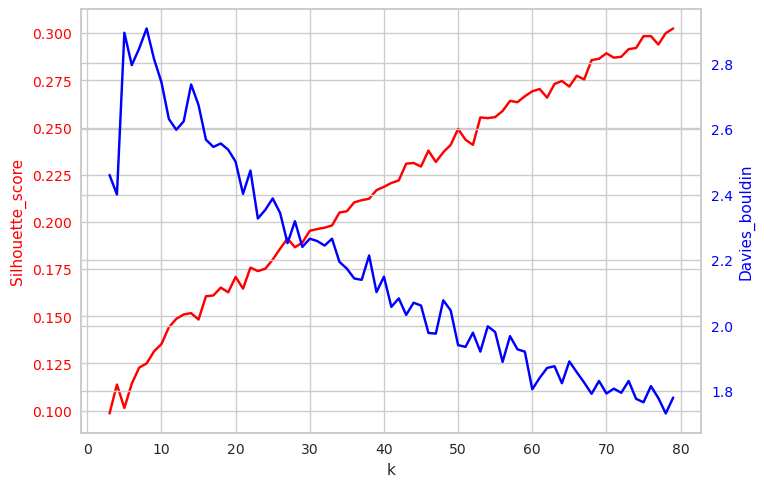

In [ ]:
plot_metrics(sil, davis_bouldin, param_name="k", param_range=param_range, silhouette_color="red", db_color="blue")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

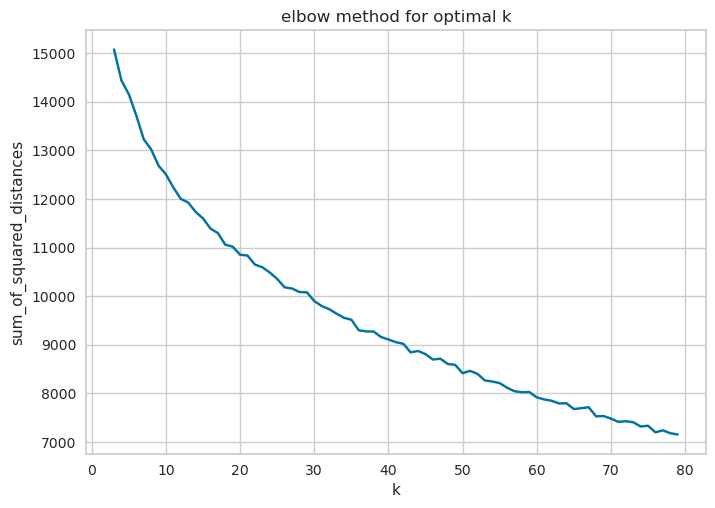

In [ ]:
# Plot inertia
plt.plot(param_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [ ]:
# Best clustering
#k = opt_val_sil
k = 100
kmeans = KMeans(n_clusters=k)
kmeans.fit(labels_encoded)

KMeans(n_clusters=100)

Graph des Silhouettes



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

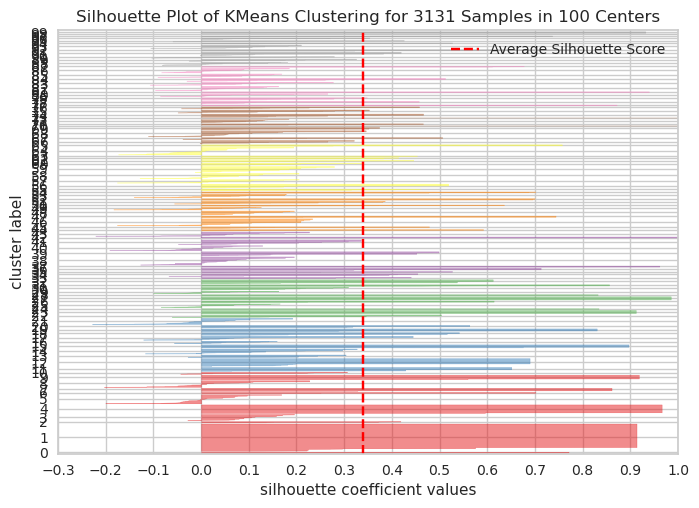

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3131 Samples in 100 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Graph des silhouettes
from yellowbrick.cluster import SilhouetteVisualizer
print("Graph des Silhouettes\n")
silhouette_vis = SilhouetteVisualizer(kmeans)
silhouette_vis.fit(labels_encoded)
silhouette_vis.poof()

In [ ]:
# Plot clusters
# Fit visualisation pipeline
import sklearn
from sklearn.manifold import TSNE
tsne =  TSNE(init="pca").fit_transform(labels_encoded)

: 

: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

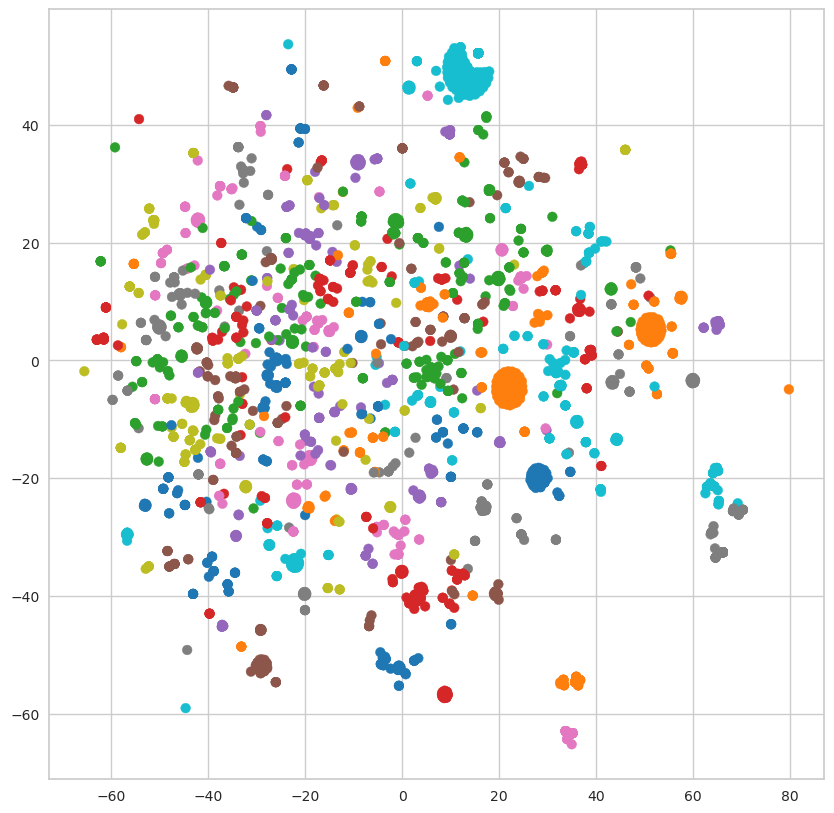

In [ ]:
# Plot TSNE
plt.figure(figsize=(10, 10))
axe = plt.axes()
clusters = kmeans.labels_
num_classes = k
palette = np.array(sns.color_palette("tab10", num_classes))
axe.scatter(x=tsne[:, 0], y=tsne[:, 1], c=palette[clusters.astype(int)])
plt.legend()